# .csv Description

| column_names | meaning |
|---|:---:|
|`vertices.vert_index1`|	vertex indices that start with 1 (R-style)|
|`vertices.x` |x coordinate|
|`vertices.y`	|y coordinate|
|`vertices.z`	|z coordinate|
|`vertices.is_border`|	1=vertex lies on the patch border, 0=does not lie on the patch border|
|`vertices.vtx_raw`|	raw vertex values that includes information about indices AND border. Vertex indices start from 1. When an index is on the border, index marked with a negative value.|
|`vertices.vert_index0`|	vertex indices that start with 0 (C-style). What freesurfer uses.|


# Reading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ['vert_index_0', 'x', 'y', 'z', 'is_border', 'vtx_raw', 'vert_index_1']
info = pd.read_csv('../../reference/fsaverage-lh_cortex_flat.csv', header=0, names=names)

vert_index_0           x          y  z  is_border  vtx_raw  vert_index_1
0           0.0  -60.013611   4.446770  0          0      1.0           1.0
1           1.0  -56.163204  88.759064  0          0      2.0           2.0
2           2.0 -112.137077 -18.977211  0          0      3.0           3.0
3           3.0  -34.436668 -72.297958  0          0      4.0           4.0
4           4.0    5.378906  -8.031876  0          0      5.0           5.0

## Plot in 2D

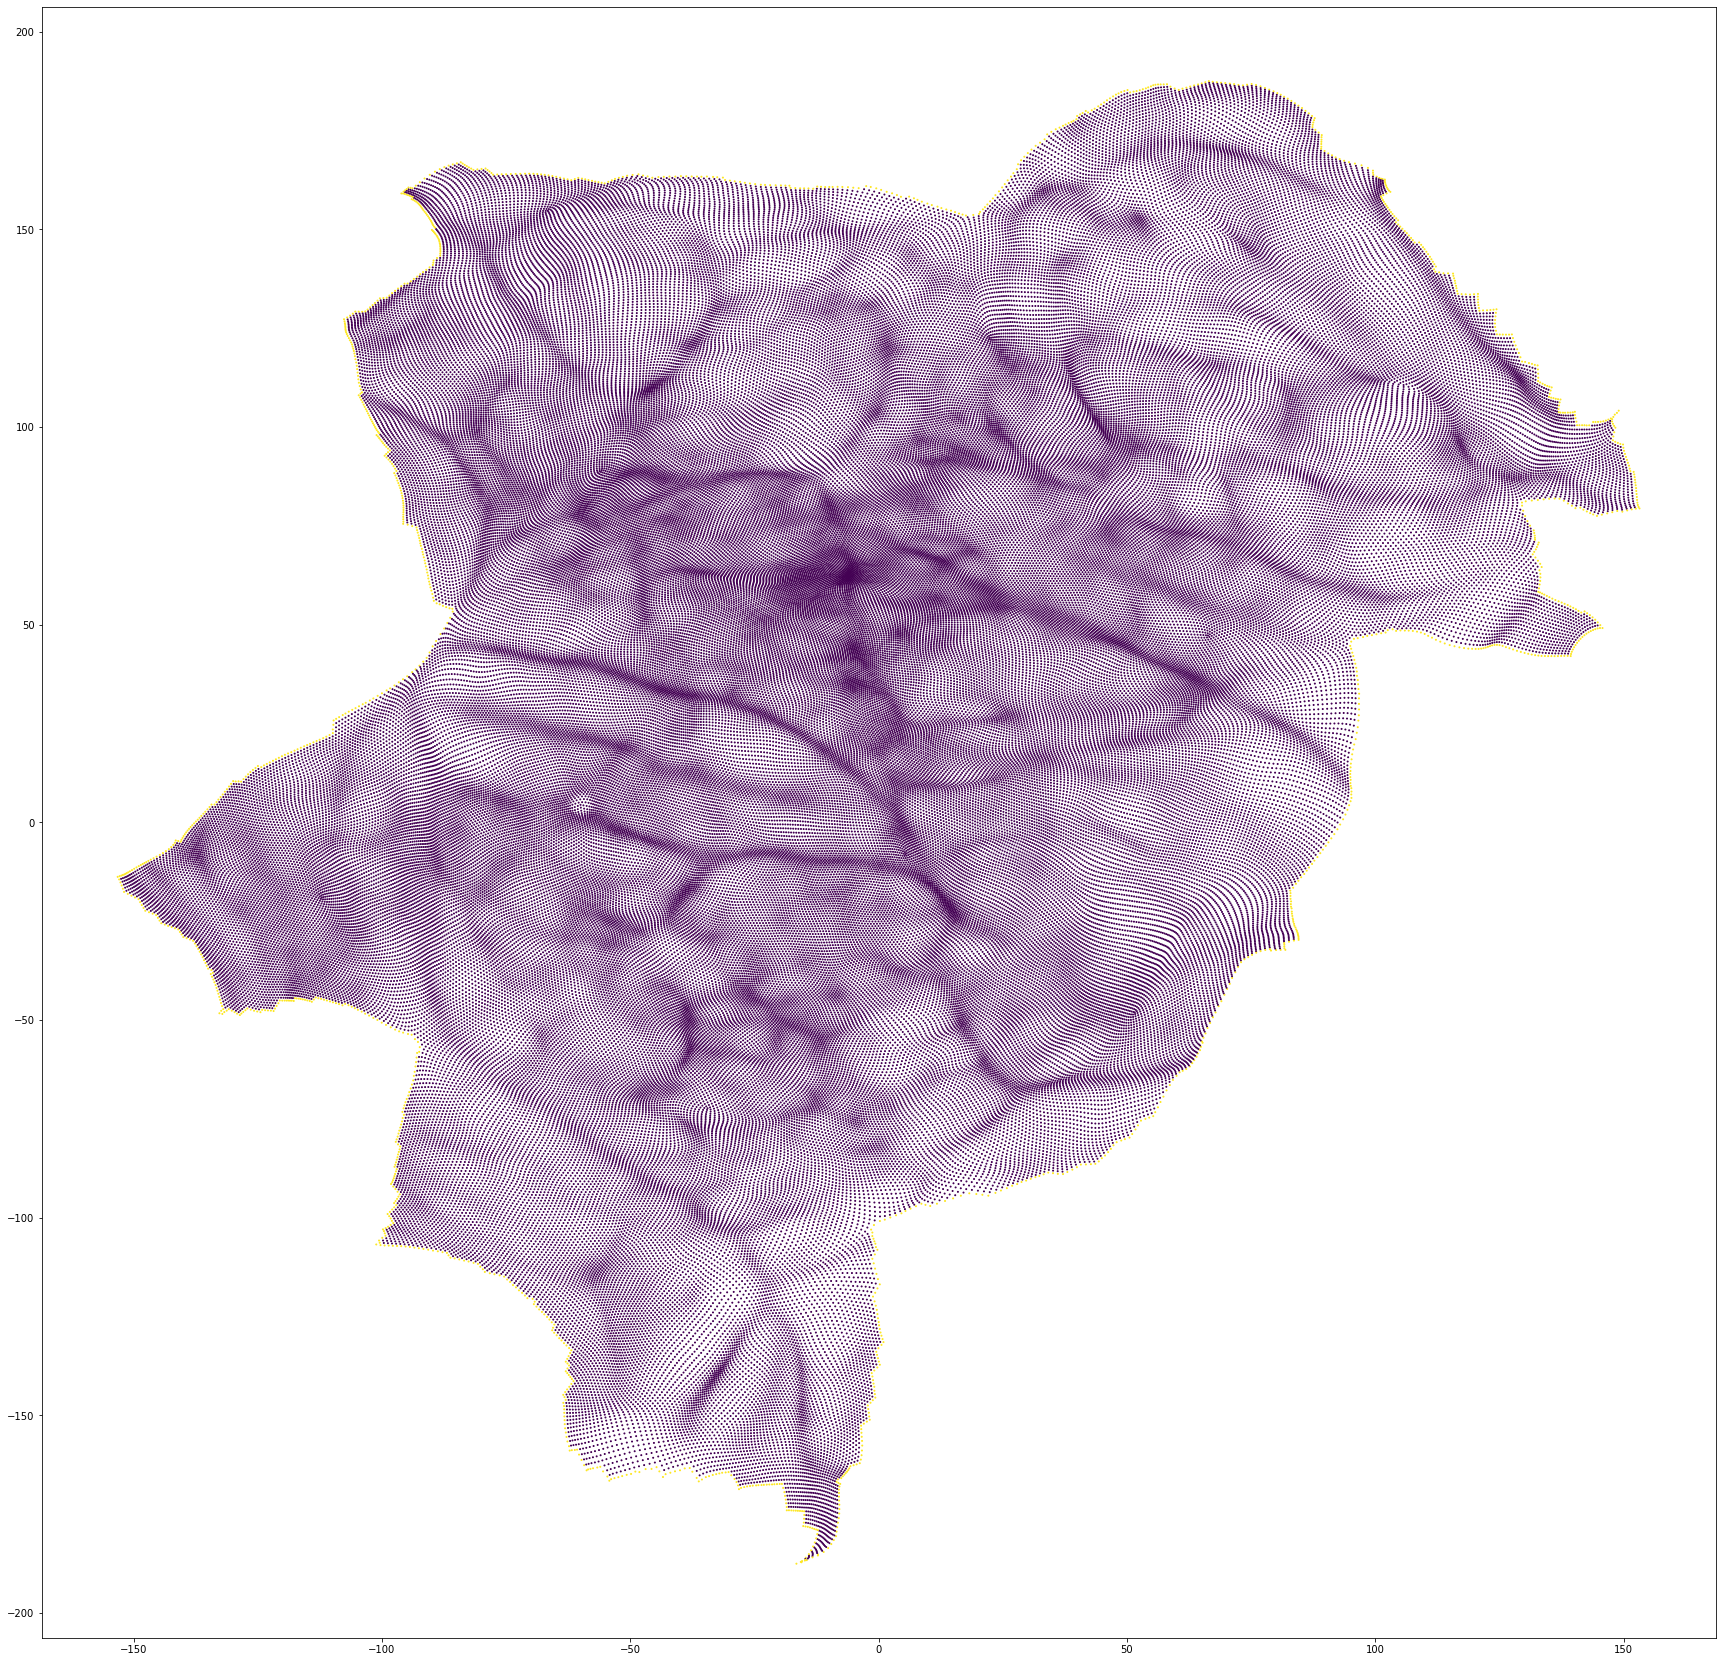

In [4]:
x = info.x.values
y = info.y.values

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 30)

plt.scatter(x, y, c=info.is_border.values, s=1)

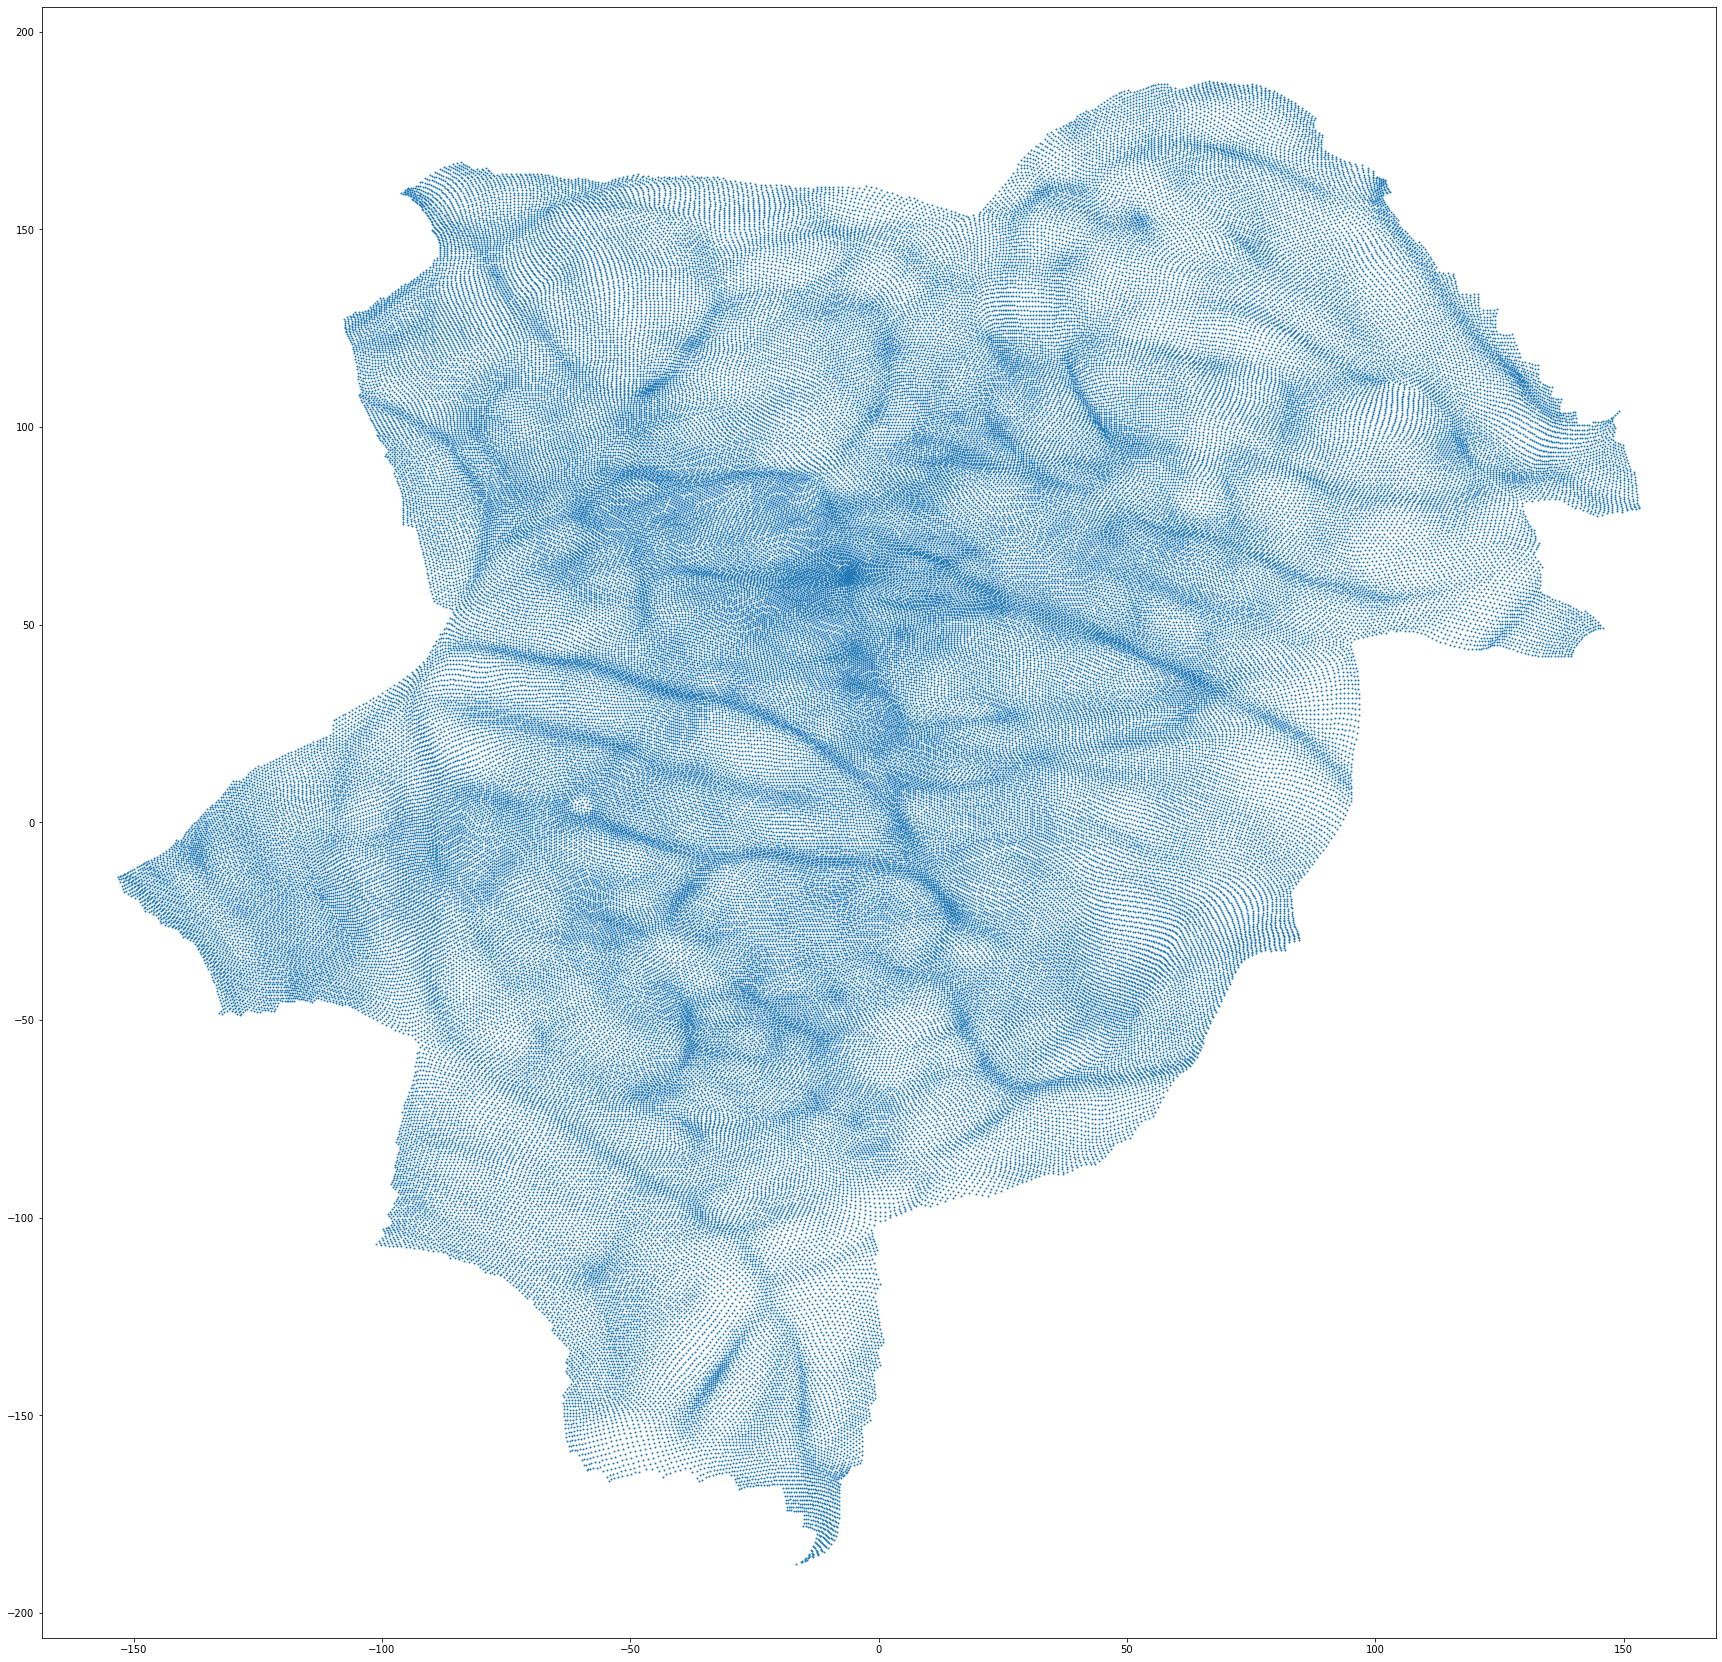

In [5]:
plt.scatter(x, y, s=1)

# Align by integer parsing

In [6]:
idx = info.vert_index_0.values.astype(int)
lh_features = {
    'area': np.load('../res/full_data_matrix/oasis1&3_ALL_lh_area-fsaverage.npy')[:, idx],
    'curv': np.load('../res/full_data_matrix/oasis1&3_ALL_lh_curv-fsaverage.npy')[:, idx],
    'jacob': np.load('../res/full_data_matrix/oasis1&3_ALL_lh_jacobian_white-fsaverage.npy')[:, idx],
    'sulc': np.load('../res/full_data_matrix/oasis1&3_ALL_lh_sulc-fsaverage.npy')[:, idx],
    'thick': np.load('../res/full_data_matrix/oasis1&3_ALL_lh_thickness-fsaverage.npy')[:, idx],
    'vol': np.load('../res/full_data_matrix/oasis1&3_ALL_lh_volume-fsaverage.npy')[:, idx],
}

In [44]:
def subject_img(i, features=lh_features, info=info):
    img = pd.DataFrame({
        'idx'  : info.vert_index_0.values,
        'x'    : info.x.values,
        'y'    : info.y.values,
        'area' : features['area'][i],
        'curv' : features['curv'][i],
        'jacob': features['jacob'][i],
        'sulc' : features['sulc'][i],
        'thick': features['thick'][i],
        'vol'  : features['vol'][i]
    })
    
    return img

In [45]:
sub000 = subject_img(0)

In [46]:
sub000

idx           x           y      area      curv     jacob  \
0            0.0  -60.013611    4.446770  0.382552 -0.162256  0.948715   
1            1.0  -56.163204   88.759064  0.338091 -0.245651  0.785565   
2            2.0 -112.137077  -18.977211  0.311414  0.011543  1.279098   
3            3.0  -34.436668  -72.297958  0.154877  0.080689  0.917379   
4            4.0    5.378906   -8.031876  0.457287 -0.083836  1.107916   
...          ...         ...         ...       ...       ...       ...   
149292  163837.0  105.713631  113.094009  0.585857  0.222108  1.014310   
149293  163838.0  106.190880  112.543823  0.315156  0.210544  1.218856   
149294  163839.0  106.766586  111.956299  0.315156  0.210544  1.218856   
149295  163840.0  106.234398  111.707588  0.560177  0.187912  1.061036   
149296  163841.0  105.644203  111.440369  0.560177  0.187912  1.061036   

            sulc     thick       vol  
0      -6.495984  1.925652  0.955984  
1      -5.860199  2.216291  0.920456  
2       4.467751  2.239614  0.792105  
3       6.324287  1.622451  0.204646  
4      -7.254117  2.717105  1.454773  
...          ...       ...       ...  
149292  4.723602  2.678560  0.743302  
149293  4.448838  2.420639  0.456207  
149294  4.448838  2.420639  0.456207  
149295  3.694161  2.487129  1.068560  
149296  3.694161  2.487129  1.068560  

[149297 rows x 9 columns]